#1

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df=pd.read_csv('/content/Pharma_Industry.csv')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


no null values and all categories datatypes are consistent.

In [120]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [121]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


<Axes: xlabel='Drug Dosage (mg)', ylabel='Count'>

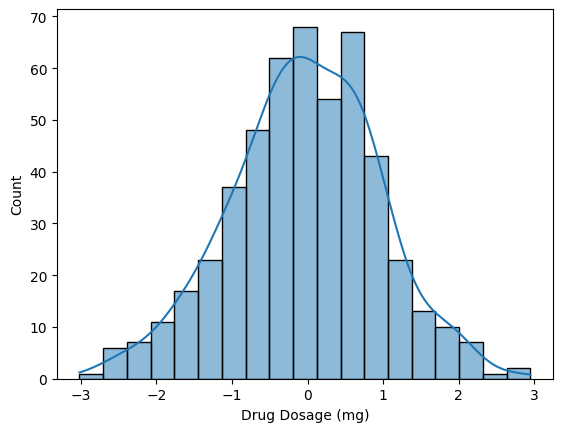

In [122]:
sns.histplot(df,x='Drug Dosage (mg)',kde=True)

<Axes: xlabel='Systolic Blood Pressure (mmHg)', ylabel='Count'>

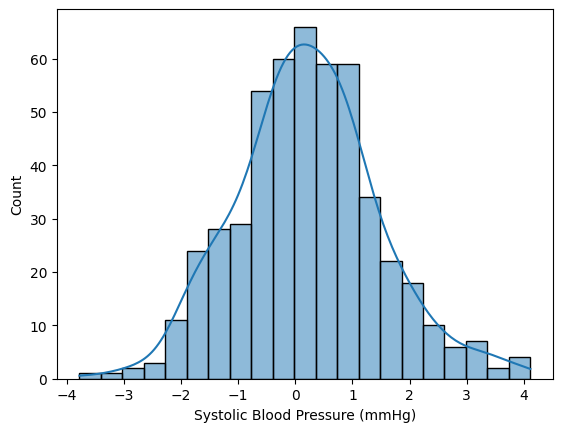

In [123]:
sns.histplot(df,x='Systolic Blood Pressure (mmHg)',kde=True)

<Axes: xlabel='Heart Rate (BPM)', ylabel='Count'>

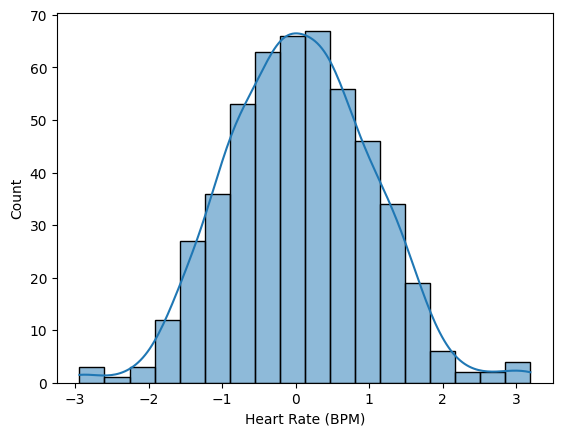

In [124]:
sns.histplot(df,x='Heart Rate (BPM)',kde=True)

<Axes: xlabel='Liver Toxicity Index (U/L)', ylabel='Count'>

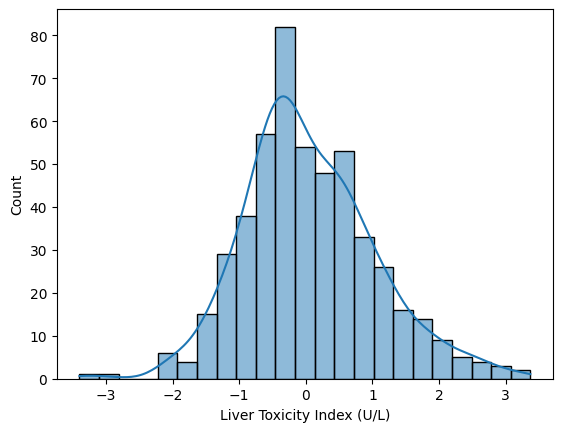

In [125]:
sns.histplot(df,x='Liver Toxicity Index (U/L)',kde=True)

<Axes: xlabel='Blood Glucose Level (mg/dL)', ylabel='Count'>

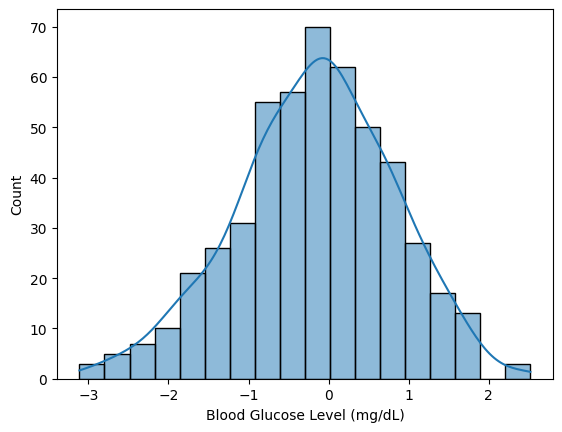

In [126]:
sns.histplot(df,x='Blood Glucose Level (mg/dL)',kde=True)

all columns are normally distributed.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Drug Dosage (mg)'),
  Text(1, 0, 'Systolic Blood Pressure (mmHg)'),
  Text(2, 0, 'Heart Rate (BPM)'),
  Text(3, 0, 'Liver Toxicity Index (U/L)'),
  Text(4, 0, 'Blood Glucose Level (mg/dL)'),
  Text(5, 0, 'Drug Response')])

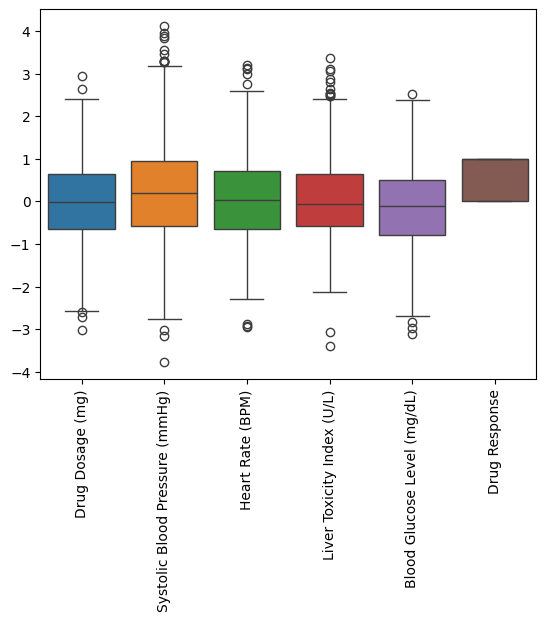

In [127]:
sns.boxplot(df)
plt.xticks(rotation=90)

there are some outliers which can be neglected

<Axes: ylabel='Density'>

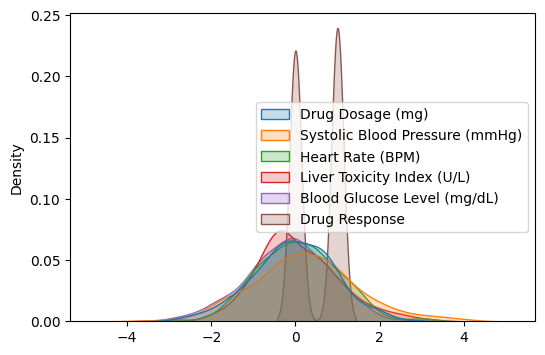

In [128]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df,fill=True)

most of them are normally distributed except liver Toxticity index column and drug response.
liver Toxticity index column is lightly positively skewed and drug response is **bimodal**

<Axes: >

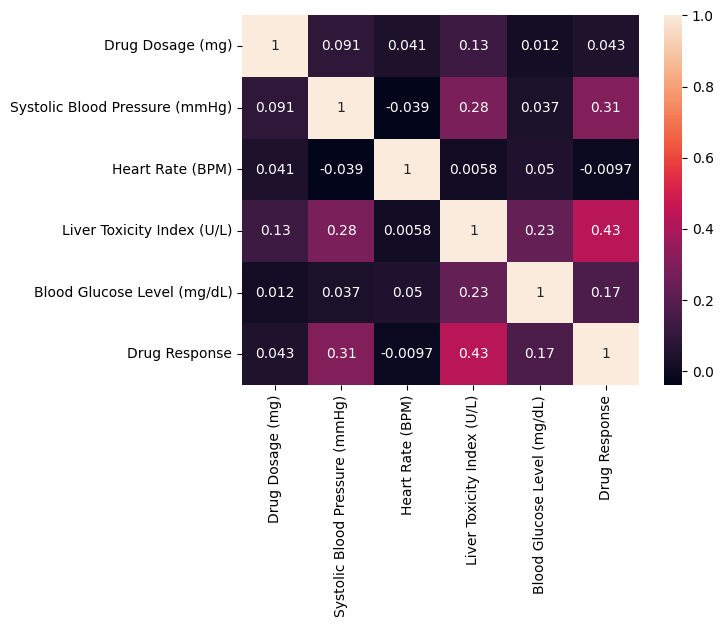

In [129]:
sns.heatmap(df.corr(),annot=True)

highly correlated columns compared to others are:
* Drug response and Systolic Blood Pressure (mmHg)
* Drug response and Liver Toxicity Index (U/L)

**Task 2: Data Preprocessing**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


No categorical variables are there in the column.so,no encoding needed

In [131]:
#define features and target
X=df.drop(columns=['Drug Response'])
y=df['Drug Response']

#split train, test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)


In [132]:
#standardized data into dataframe
X_train_scaled_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_train_scaled_df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL)
0,-0.010285,-1.107570,-0.328323,-0.250294,-0.162308
1,0.354907,0.077207,0.128122,0.051376,0.168366
2,-1.268646,0.629564,0.436384,1.256175,0.426656
3,-0.364318,2.005836,-1.398641,1.465089,-0.036914
4,1.067823,0.243768,0.209663,2.314600,-0.315061


# 3

<Figure size 2000x2000 with 0 Axes>

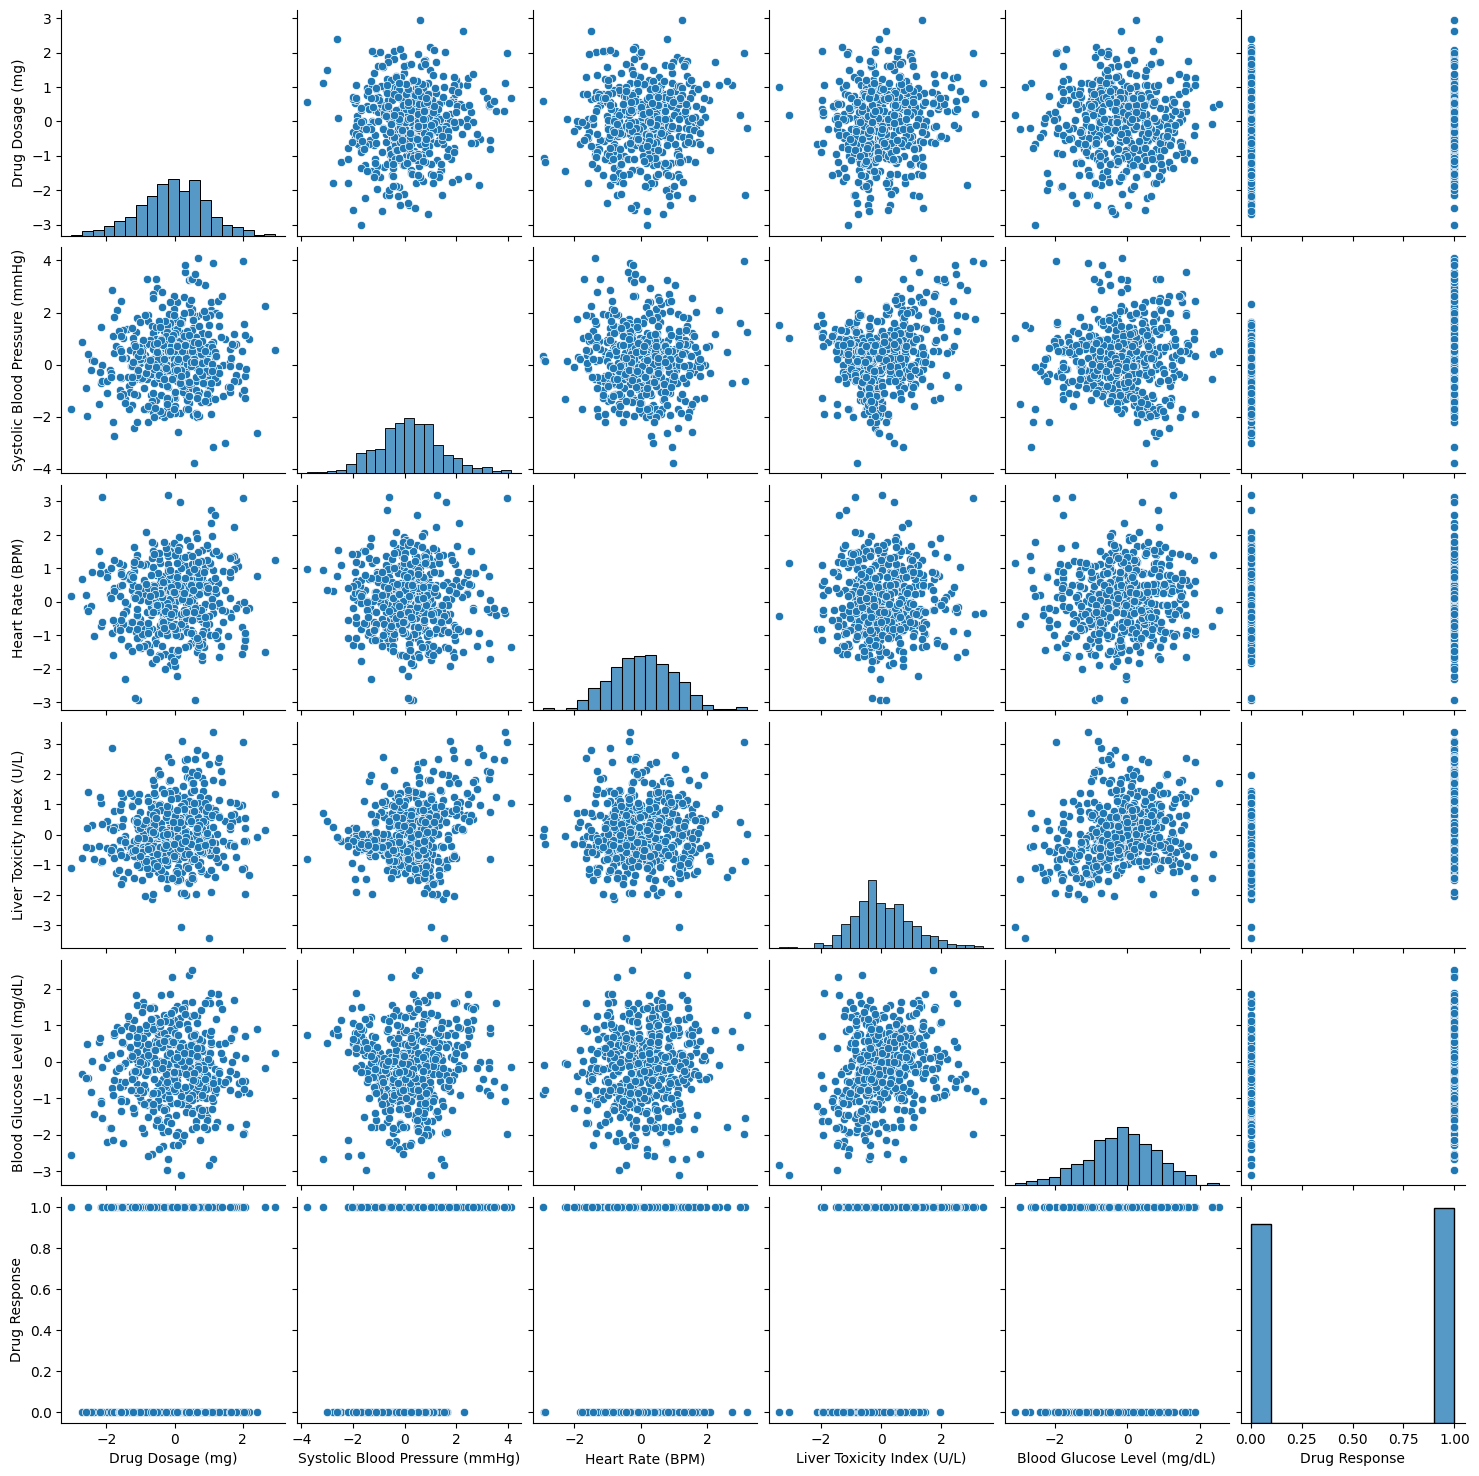

In [133]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

<Axes: ylabel='count'>

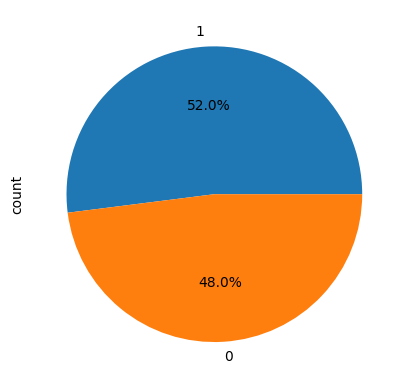

In [134]:
df['Drug Response'].value_counts().plot.pie(autopct='%1.1f%%')

it is lightly imbalanced.0 class is less than 1 class

#4

In [153]:
from sklearn.svm import SVC
svm=SVC(C=10,kernel="rbf",random_state=42)
svm.fit(X_train_sc,y_train)

SVC(C=10, random_state=42)

In [154]:
y_pred =svm.predict(X_test_sc)

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
Precision: 0.7636363636363637
Recall: 0.8076923076923077
F1 Score: 0.7850467289719626

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        48
           1       0.76      0.81      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



# 5

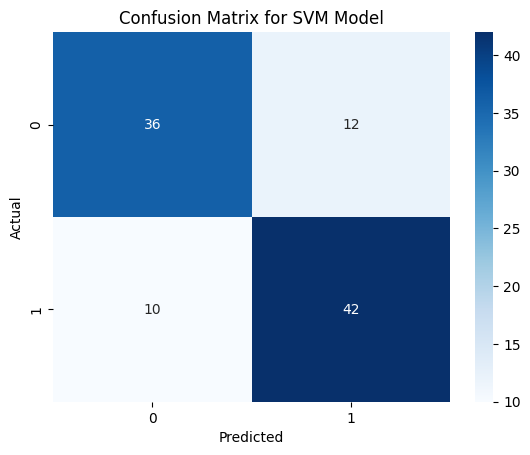

In [138]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#6

In [139]:
# Parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

#define parameters
para_grid={
    'C':[0.01,0.1,1,10,100],
    'kernel':['linear','poly','rbf','sigmoid']
}
grid = GridSearchCV(svm, para_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_sc, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'kernel': 'rbf'}


#7

In [155]:
#Comparison and Analysis]
from sklearn.svm import SVC
y_pred =svm.predict(X_test_sc)


# RADIAL BASIS FUNCTION
svm1=SVC(C=1,kernel="rbf",random_state=42)
svm.fit(X_train_sc,y_train)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.78
Precision: 0.7777777777777778
Recall: 0.8076923076923077
F1 Score: 0.7924528301886793

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77        48
           1       0.78      0.81      0.79        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [156]:
#PLOYNIMIAL

svm=SVC(C=1,kernel="poly",random_state=42)
svm.fit(X_train_sc,y_train)
y_pred =svm.predict(X_test_sc)


# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.71
Precision: 0.7346938775510204
Recall: 0.6923076923076923
F1 Score: 0.7128712871287128

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        48
           1       0.73      0.69      0.71        52

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



In [158]:
#LINEAR

svm=SVC(C=1,kernel="linear",random_state=42)
svm.fit(X_train_sc,y_train)
y_pred =svm.predict(X_test_sc)


# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72
Precision: 0.7608695652173914
Recall: 0.6730769230769231
F1 Score: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



after comparing the accuracy of all the kernels **"rbf"** is giving more accuracy then all other kernals.
**rbf>linear>ploynomial**